In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
citymaster= pd.read_csv("City_Master.csv")
rcodemaster= pd.read_csv("region_code_master.csv")
statemaster= pd.read_csv("State_Master.csv")
custdetails = pd.read_csv("Customer_and_bank details_p1.csv")
target = pd.read_csv("Customer_Response_data_P1.csv")
campaign = pd.read_csv("Customer_campaign_details_p1.csv")
soc_eco= pd.read_csv("Customer_social_economic_data_p1.csv")

In [3]:
cust_outcome = pd.merge(custdetails, target, on='Customer_id', how='inner')
cust_outcome.tail()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,y
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,C21,yes
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,C21,no
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,C21,no
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,C49,yes
37083,37084,74,retired,married,professional.course,no,yes,no,1,S6,C113,no


In [4]:
co = pd.merge(cust_outcome, soc_eco, on='Customer_id').sort_values(by="Customer_id")

In [5]:
co.tail()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,City_Code,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,C21,yes,-1.1,94.767,-50.8,1.028,4963.6
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,C21,no,-1.1,94.767,-50.8,1.028,4963.6
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,C21,no,-1.1,94.767,-50.8,1.028,4963.6
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,C49,yes,-1.1,94.767,-50.8,1.028,4963.6
37083,37084,74,retired,married,professional.course,no,yes,no,1,S6,C113,no,-1.1,94.767,-50.8,1.028,4963.6


In [6]:
co.drop(columns= ['Customer_id','job', 'education', 'State_Code','City_Code', 'Region_Code','marital'], inplace=True)

In [7]:
co.tail()

,age,default,housing,loan,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
37079,73,no,yes,no,yes,-1.1,94.767,-50.8,1.028,4963.6
37080,46,no,no,no,no,-1.1,94.767,-50.8,1.028,4963.6
37081,56,no,yes,no,no,-1.1,94.767,-50.8,1.028,4963.6
37082,44,no,no,no,yes,-1.1,94.767,-50.8,1.028,4963.6
37083,74,no,yes,no,no,-1.1,94.767,-50.8,1.028,4963.6


In [14]:
co['housing']= co["housing"].replace(['yes','no'],['1','0'])
co['loan']= co["loan"].replace(['yes','no'],['1','0'])
co['y']= co["y"].replace(['yes','no'],['1','0'])
co['default']= co["default"].replace(['yes','no'],['1','0'])
inplace=True
co.tail()

,age,default,housing,loan,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
37079,73,0,1,0,1,-1.1,94.767,-50.8,1.028,4963.6
37080,46,0,0,0,0,-1.1,94.767,-50.8,1.028,4963.6
37081,56,0,1,0,0,-1.1,94.767,-50.8,1.028,4963.6
37082,44,0,0,0,1,-1.1,94.767,-50.8,1.028,4963.6
37083,74,0,1,0,0,-1.1,94.767,-50.8,1.028,4963.6


In [17]:
co['housing']= co["housing"].replace(['unknown','0'])
co['loan']= co["loan"].replace(['unknown','0'])
co['default']= co["default"].replace(['unknown','0'])

In [18]:
co[co == "unknown"].count().sum()

0

In [19]:
co.isnull().sum()

age               0
default           0
housing           0
loan              0
y                 0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [20]:
co['default'].value_counts()

0    19412
1    17672
Name: default, dtype: int64

In [21]:
data=pd.read_csv("data.csv")
data.head()

,Unnamed: 0,age,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_yes,Region_Name_East,Region_Name_South,Region_Name_West,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,marital_married,marital_single,default_yes,housing_yes,loan_yes
0,0,56,93.994,-36.4,4.857,5191.0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,1,52,93.994,-36.4,4.857,5191.0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,2,32,93.994,-36.4,4.857,5191.0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,3,36,93.994,-36.4,4.857,5191.0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,4,33,93.994,-36.4,4.857,5191.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age', 'default', 'housing', 'loan', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
co[num_cols] = scaler.fit_transform(co[num_cols])

co.head()

,age,default,housing,loan,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.529527,-0.95413,-96.280839,0.0,0,0.648404,0.722446,0.888187,0.712439,0.331618
1,0.475162,-0.95413,-96.280839,0.0,0,0.648404,0.722446,0.888187,0.712439,0.331618
2,1.817081,-0.95413,-96.280839,0.0,0,0.648404,0.722446,0.888187,0.712439,0.331618
3,0.091757,-0.95413,-96.280839,0.0,0,0.648404,0.722446,0.888187,0.712439,0.331618
4,-1.537715,-0.95413,0.010386,0.0,0,0.648404,0.722446,0.888187,0.712439,0.331618


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(co)

StandardScaler()

In [25]:
scaled_data = scaler.transform(co)
scaled_data

array([[ 1.52952697e+00, -9.54130349e-01, -9.62808392e+01, ...,
         8.88186517e-01,  7.12438640e-01,  3.31617516e-01],
       [ 4.75162431e-01, -9.54130349e-01, -9.62808392e+01, ...,
         8.88186517e-01,  7.12438640e-01,  3.31617516e-01],
       [ 1.81708093e+00, -9.54130349e-01, -9.62808392e+01, ...,
         8.88186517e-01,  7.12438640e-01,  3.31617516e-01],
       ...,
       [ 1.52952697e+00,  1.04807483e+00,  1.03862825e-02, ...,
        -2.22735946e+00, -1.49581599e+00, -2.81815756e+00],
       [ 3.79311109e-01,  1.04807483e+00,  1.03862825e-02, ...,
        -2.22735946e+00, -1.49581599e+00, -2.81815756e+00],
       [ 3.25485076e+00,  1.04807483e+00,  1.03862825e-02, ...,
        -2.22735946e+00, -1.49581599e+00, -2.81815756e+00]])

In [26]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)

In [29]:
pca.fit(scaled_data)

PCA(n_components=2)

In [30]:
x_pca = pca.transform(scaled_data)

In [31]:
scaled_data.shape

(37084, 10)

In [32]:
x_pca.shape

(37084, 2)

Text(0, 0.5, 'Second Principal Component')

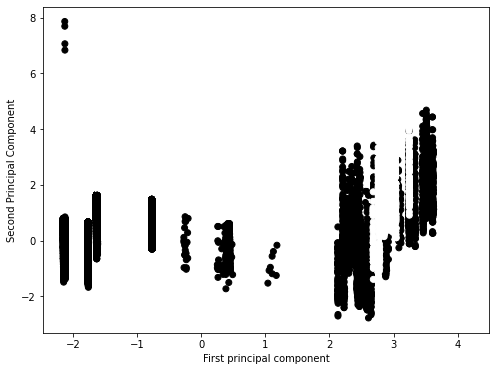

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=co['y'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [35]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [36]:
y=co['y']
X=co
X.drop(['y'], axis = 1, inplace = True)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [38]:
pca.fit(X_train)

PCA(n_components=0.95)

In [40]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [43]:
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [44]:
logisticRegr.predict(X_test[0].reshape(1,-1))

array(['0'], dtype=object)

In [45]:
logisticRegr.predict(X_test[0:10])

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], dtype=object)

In [46]:
logisticRegr.score(X_test, y_test)

0.8905217743022785